In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

Cargar la información y crear los sets de entrenamiento y prueba

In [2]:
df = pd.read_csv('BostonHousing.csv')

X = df.drop("medv",axis=1) # Features

Y = df["medv"] # Target column i.e price range

# splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Crear el modelo

In [17]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

Calcular el coeficiente de determinación R2 en training y en test

In [18]:
r2_training = r2_score(modelo.predict(X_train), Y_train)

r2_test = r2_score(modelo.predict(X_test), Y_test)

r2_training, r2_test

# El modelo no es muy bueno, pero no hay sobreajuste (overfitting) ya que el R2 en test es mayor que en train


(0.5923183817692151, 0.6504772051680288)

Scatter plot que enfrente el precio real de la casa con el precio estimado por el modelo

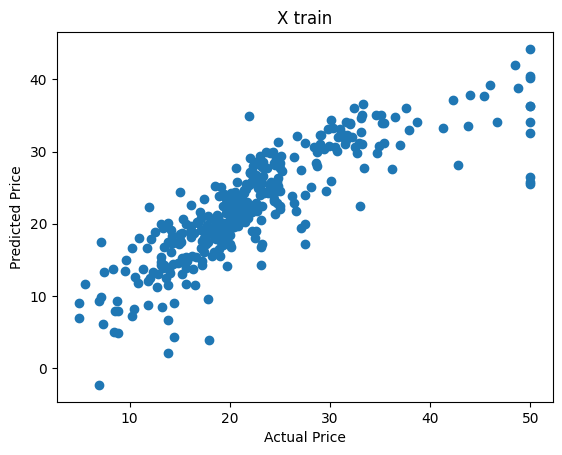

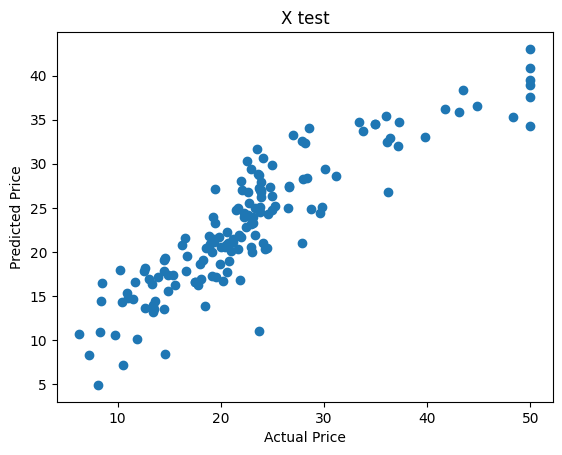

In [19]:
# training
plt.scatter(Y_train, modelo.predict(X_train))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('X train')
plt.show()

# test
plt.scatter(Y_test, modelo.predict(X_test))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('X test')
plt.show()

# Como vemos efectivamente el R2 estaba en lo cierto, y el modelo se desenvuelve mejor en el test que en el train


Imprime por pantalla los coeficientes del modelo lineal ajustado

In [49]:
w = modelo.coef_
b = modelo.intercept_

print(f"w:{w}\nb:{b}")

w:[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]
b:46.39649387182381


Calcular las predicciones de tu modelo usando esos coeficientes (sin usar model.predict) y checkea que coincide exactamente con model.predict

In [56]:
# Predecir X_test   

y_pred = np.empty(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = np.dot(w, X_test.iloc[i]) + b

y_pred_model = modelo.predict(X_test)

print("Son iguales:", np.allclose(y_pred, y_pred_model, rtol=1e-05, atol=1e-08)) # Ver si las predicciones son iguales (con un pequeño margen por ser floats)

Son iguales: True


¿Se cumple la suposición de que los residuos siguen una distribución gaussiana (normal)?

ESTO NO ME APETECE

Transformar el target con una transformación logarítmica y ver el histograma de la variable sin transformar y la variable transformada ¿Qué observas?

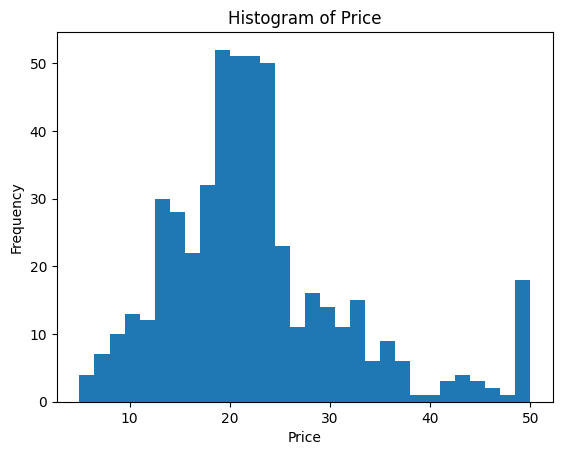

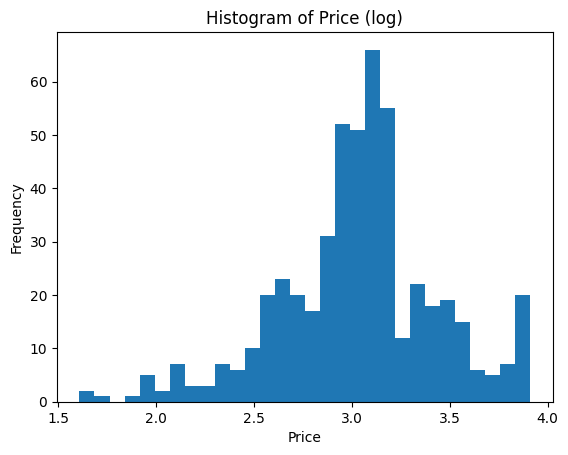

In [58]:
# histograma del target

plt.hist(Y, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# aplicar logaritmo al target

Y_log = np.log(Y)

plt.hist(Y_log, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price (log)')
plt.show()


Se ve que se ha movido pa la derecha
(en verdad se usa para quitar la asimetría)

Crear un modelo con el target transformado

r2_test: 0.6504772051680288
r2_test_log: 0.7021787152392814


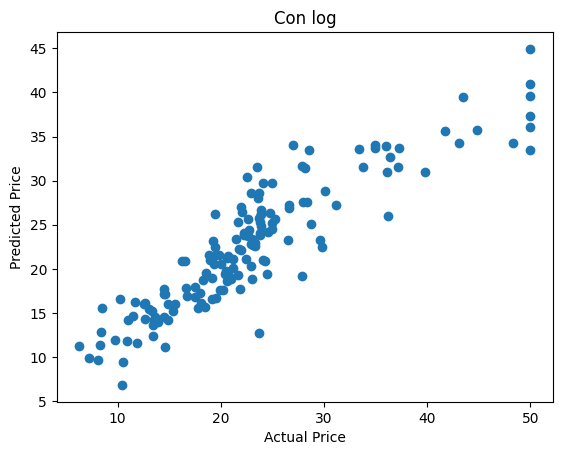

In [67]:
modelo_log = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.30 , random_state=1)
modelo_log.fit(X_train, Y_train)

y_pred_log = modelo_log.predict(X_test)

r2_test_log = r2_score(y_pred_log, Y_test)

plt.scatter(np.exp(Y_test), np.exp(y_pred_log))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Con log')

print(f"r2_test: {r2_test}\nr2_test_log: {r2_test_log}")

Como vemos si que ha mejorado con la transformación